In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

### Question1
#### (a)

In [81]:
df = pd.read_csv('data/strongdrink.txt', na_values='?')
df.head()

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [82]:
print(df.cultivar.value_counts())

2    71
1    59
3    46
Name: cultivar, dtype: int64


In [83]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
X = df[['alco', 'malic', 'tot_phen', 'color_int']]
y = df.cultivar
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size = 0.25, random_state=20)
clf = LogisticRegression(random_state=20, solver='lbfgs',multi_class='multinomial', max_iter=5000).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("Intercept: ", clf.intercept_[0], clf.intercept_[1])
print("Coefficients: ", clf.coef_[0], clf.coef_[1])

              precision    recall  f1-score   support

           1       0.87      1.00      0.93        13
           2       1.00      0.90      0.95        21
           3       1.00      1.00      1.00        10

   micro avg       0.95      0.95      0.95        44
   macro avg       0.96      0.97      0.96        44
weighted avg       0.96      0.95      0.96        44

Intercept:  -24.0276188921462 22.78073479069391
Coefficients:  [ 1.70173483 -0.26578784  1.22410102  0.02250657] [-1.46629732 -0.33295213  0.66355612 -0.92268165]


Error rate is 0.13, 0 and 0.
The model is best at predicting category 3. It's not the one with the most observations.

In [84]:
N = len(y_test)
mean_squared_err = np.sum((y_test != y_pred))/N
print("Mean squared error is {}".format(mean_squared_err))

Mean squared error is 0.045454545454545456


#### (b) LOOCV

In [85]:
from sklearn.model_selection import LeaveOneOut
Xvars = df[['alco', 'malic', 'tot_phen', 'color_int']].values
yvars = df['cultivar'].values
N_loo = Xvars.shape[0]
loo = LeaveOneOut()
loo.get_n_splits(Xvars)
MSE_vec = np.zeros(N_loo)
y_test_lst = np.zeros(N_loo)
y_pred_lst = np.zeros(N_loo)

In [86]:
for train_index, test_index in loo.split(Xvars):
    X_train, X_test = Xvars[train_index], Xvars[test_index]
    y_train, y_test = yvars[train_index], yvars[test_index]
    LogReg = LogisticRegression()
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    y_pred_lst[test_index] = y_pred
    y_test_lst[test_index] = y_test
    MSE_vec[test_index] = (y_test != y_pred)
    print('MSE for test set', test_index, ' is', MSE_vec[test_index])

MSE for test set [0]  is [0.]
MSE for test set [1]  is [0.]
MSE for test set [2]  is [0.]
MSE for test set [3]  is [0.]
MSE for test set [4]  is [0.]
MSE for test set [5]  is [0.]
MSE for test set [6]  is [0.]
MSE for test set [7]  is [0.]
MSE for test set [8]  is [0.]
MSE for test set [9]  is [0.]
MSE for test set [10]  is [0.]
MSE for test set [11]  is [1.]
MSE for test set [12]  is [0.]
MSE for test set [13]  is [0.]
MSE for test set [14]  is [0.]
MSE for test set [15]  is [0.]
MSE for test set [16]  is [0.]
MSE for test set [17]  is [0.]
MSE for test set [18]  is [0.]
MSE for test set [19]  is [0.]
MSE for test set [20]  is [0.]
MSE for test set [21]  is [1.]
MSE for test set [22]  is [1.]
MSE for test set [23]  is [1.]
MSE for test set [24]  is [1.]
MSE for test set [25]  is [1.]
MSE for test set [26]  is [0.]
MSE for test set [27]  is [1.]
MSE for test set [28]  is [0.]
MSE for test set [29]  is [0.]
MSE for test set [30]  is [0.]
MSE for test set [31]  is [0.]
MSE for test set [

In [87]:
print(classification_report(y_test_lst, y_pred_lst))

              precision    recall  f1-score   support

         1.0       0.84      0.78      0.81        59
         2.0       0.83      0.89      0.86        71
         3.0       0.96      0.93      0.95        46

   micro avg       0.86      0.86      0.86       176
   macro avg       0.87      0.87      0.87       176
weighted avg       0.86      0.86      0.86       176



Error rate for each type is 0.16, 0.17, 0.04 respectively. The most precise estimation is j=3.

In [88]:
MSE_loo = MSE_vec.mean()
MSE_loo_std = MSE_vec.std()
print('Test estimate MSE loocv = {}.'.format(MSE_loo))

Test estimate MSE loocv = 0.13636363636363635.


#### (c)

In [90]:
from sklearn.model_selection import KFold
k = 4
kf = KFold(k, shuffle=True, random_state=10)
kf.get_n_splits(Xvars)
MSE_vec_kf = np.zeros(k)
y_test_lst2 = np.zeros(N_loo)
y_pred_lst2 = np.zeros(N_loo)

In [92]:
k_ind = int(0)
for train_index, test_index in kf.split(Xvars):
    # print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = Xvars[train_index], Xvars[test_index]
    y_train, y_test = yvars[train_index], yvars[test_index]
    LogReg = LogisticRegression()
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    y_test_lst2[test_index] = y_test
    y_pred_lst2[test_index] = y_pred
    MSE_vec_kf[k_ind] = (y_test != y_pred).mean()
    print('MSE for test set', k_ind, ' is', MSE_vec_kf[k_ind])
    k_ind += 1

MSE_kf = MSE_vec_kf.mean()
print(classification_report(y_test_lst2, y_pred_lst2))
print('test estimate MSE k-fold = {}.'.format(MSE_kf))

MSE for test set 0  is 0.22727272727272727
MSE for test set 1  is 0.22727272727272727
MSE for test set 2  is 0.13636363636363635
MSE for test set 3  is 0.09090909090909091
              precision    recall  f1-score   support

         1.0       0.78      0.73      0.75        59
         2.0       0.79      0.85      0.82        71
         3.0       0.96      0.93      0.95        46

   micro avg       0.83      0.83      0.83       176
   macro avg       0.84      0.84      0.84       176
weighted avg       0.83      0.83      0.83       176

test estimate MSE k-fold = 0.17045454545454544.


The error rate for each type is 0.23, 0.21, 0.04 repsectively.

## Question2

#### (a)

In [12]:
df = pd.read_csv('data/CoolIndex.txt', header=None, names=['Age', 'CoolIndex'])
df.head()

,Age,CoolIndex
0,11.0,10.981602
1,11.0,11.364925
2,11.0,10.190227
3,11.0,9.903725
4,11.0,8.997918


<IPython.core.display.Javascript object>


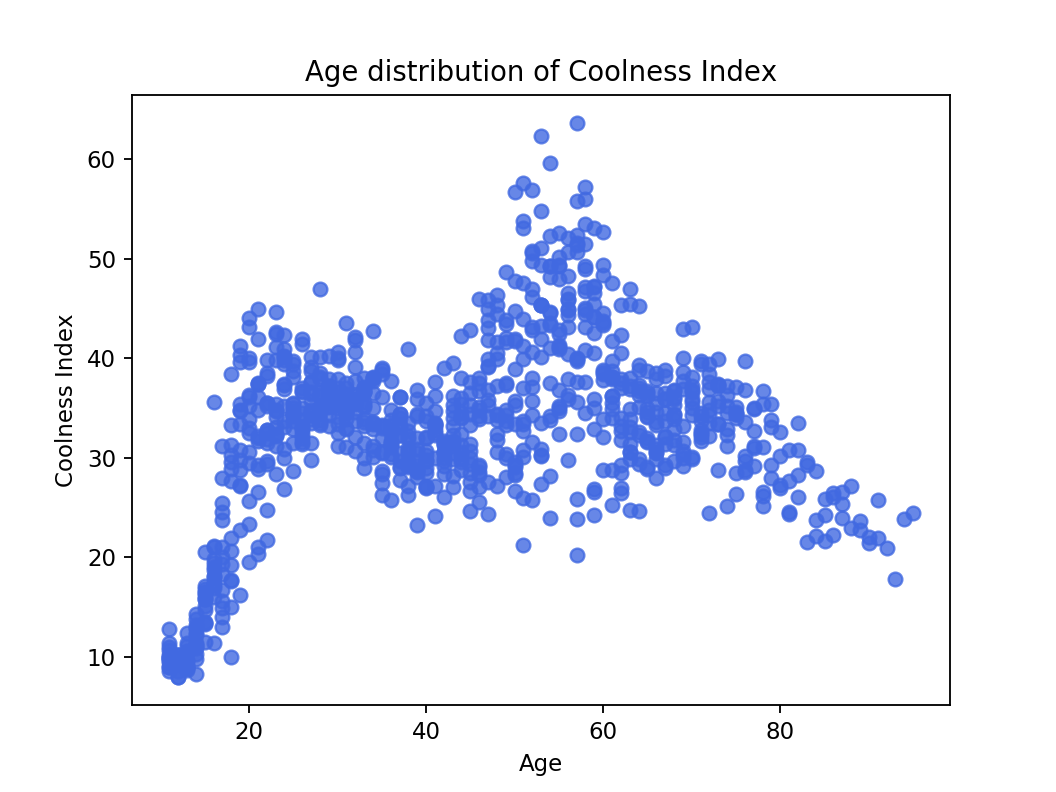

Text(0.5, 1.0, 'Age distribution of Coolness Index')

In [32]:
%matplotlib notebook
plt.scatter(df.Age, df.CoolIndex, color='royalblue', alpha=0.8)
plt.xlabel('Age')
plt.ylabel('Coolness Index')
plt.title('Age distribution of Coolness Index')

#### (b)

In [20]:
y1 = df.CoolIndex[(df.Age>=11) & (df.Age<22)]
y2 = df.CoolIndex[(df.Age>=22) & (df.Age<40)]
y3 = df.CoolIndex[(df.Age>=40) & (df.Age<59)]
y4 = df.CoolIndex[(df.Age>=59) & (df.Age<77)]
y5 = df.CoolIndex[(df.Age>=77) & (df.Age<=95)]
params = []
for y in [y1,y2,y3,y4,y5]:
    X = np.ones(y.shape[0]).reshape(-1,1)
    model = sm.OLS(y, X)
    result = model.fit()
    #print(result.params[0])
    params.append(result.params[0])

<IPython.core.display.Javascript object>


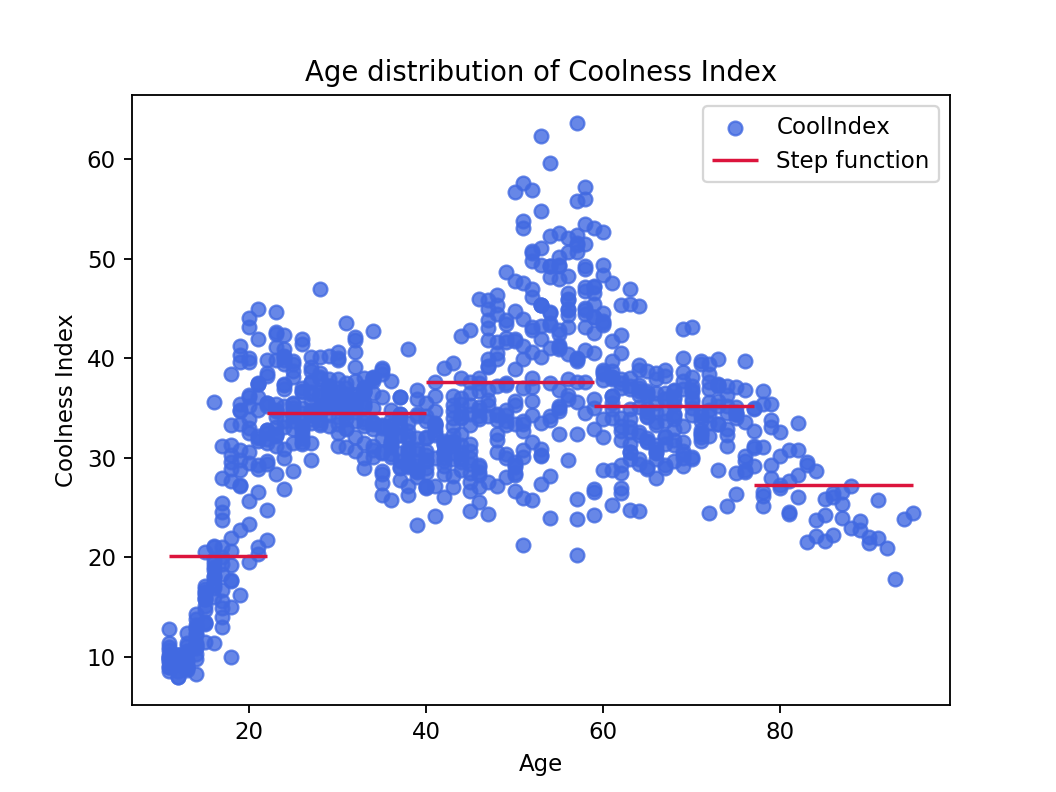

Text(0.5, 1.0, 'Age distribution of Coolness Index')

In [31]:
%matplotlib notebook
plt.scatter(df.Age, df.CoolIndex, color='royalblue', alpha=0.8)
x_min = np.array([11, 22, 40, 59, 77])
x_max = np.array([22, 40, 59, 77, 95])
plt.hlines(params, x_min, x_max, color='crimson', label='Step function')
plt.xlabel('Age')
plt.ylabel('Coolness Index')
plt.legend(loc='upper right')
plt.title('Age distribution of Coolness Index')

In [22]:
print(params)

[20.102457252090744, 34.475788077559386, 37.635105492449604, 35.22540004024275, 27.296378244321282]


The predicted coolness of a 73-year old from the stepwise function is 35.23.

#### (c)

In [23]:
from scipy.interpolate import LSQUnivariateSpline
t = np.array([22.0,40.0,59, 77.0])
df.sort_index(0, ascending=True, inplace=True)

In [24]:
grouped = df.groupby('Age', as_index = False).mean()
spl = LSQUnivariateSpline(grouped.Age.values, grouped.CoolIndex.values, t, k=1)
age_new = np.linspace(11,95,1000)

<IPython.core.display.Javascript object>


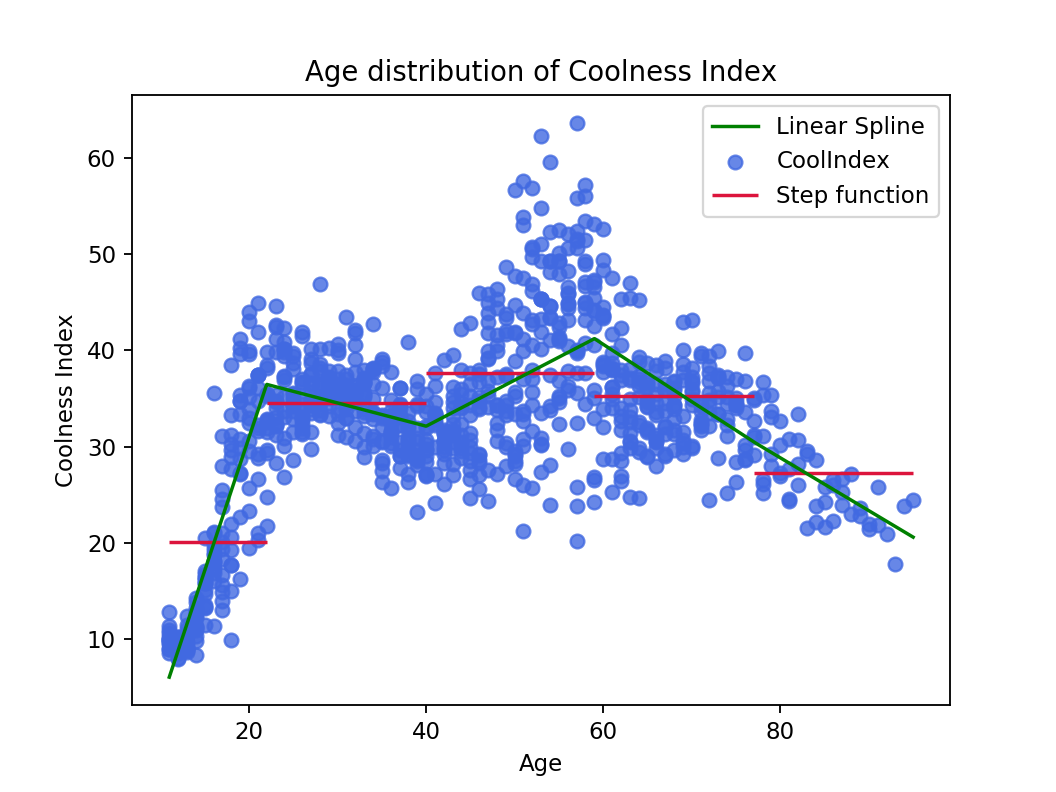

Text(0.5, 1.0, 'Age distribution of Coolness Index')

In [30]:
%matplotlib notebook
plt.scatter(df.Age, df.CoolIndex, color='royalblue', alpha=0.8)
plt.hlines(params, x_min, x_max, color='crimson', label='Step function')
plt.plot(age_new, spl(age_new), color='green', label='Linear Spline')
plt.xlabel('Age')
plt.ylabel('Coolness Index')
plt.legend(loc='upper right')
plt.title('Age distribution of Coolness Index')

#### (d)

<IPython.core.display.Javascript object>


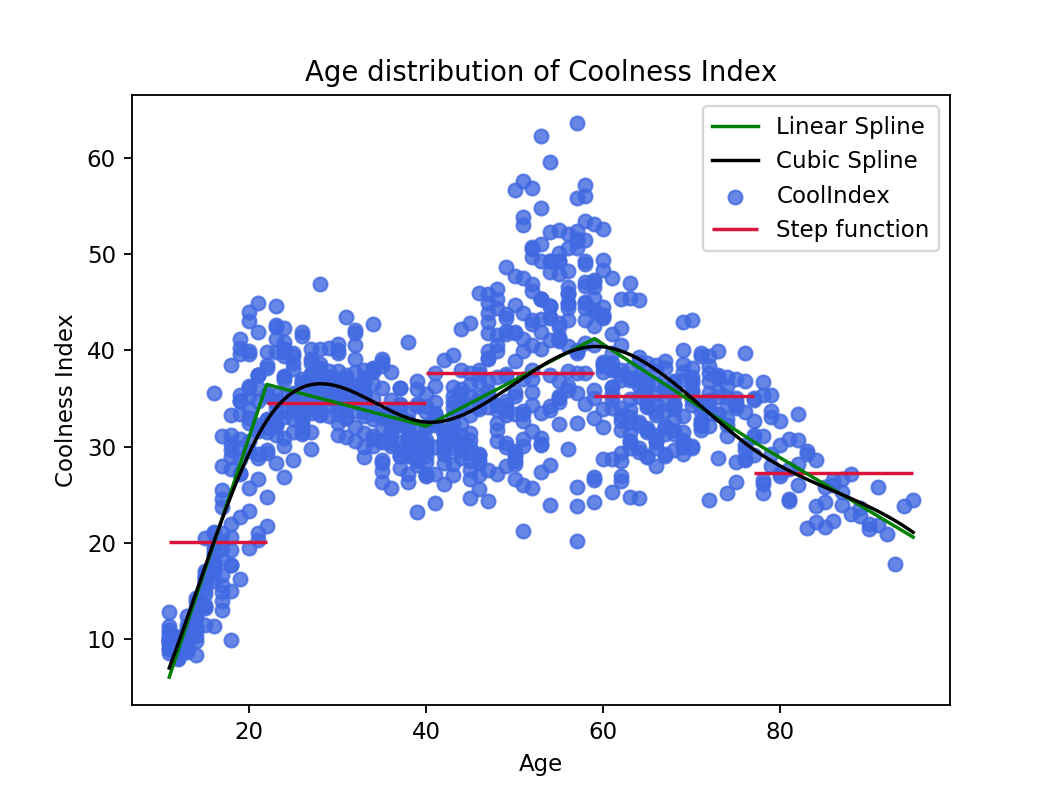

Text(0.5, 1.0, 'Age distribution of Coolness Index')

In [35]:
%matplotlib notebook
spl2 = LSQUnivariateSpline(grouped.Age.values, grouped.CoolIndex.values, t, k=3)
plt.scatter(df.Age, df.CoolIndex, color='royalblue', alpha=0.8)
plt.hlines(params, x_min, x_max, color='crimson', label='Step function')
plt.plot(age_new, spl(age_new), color='green', label='Linear Spline')
plt.plot(age_new, spl2(age_new), 'k-', label='Cubic Spline')
plt.xlabel('Age')
plt.ylabel('Coolness Index')
plt.legend(loc='upper right')
plt.title('Age distribution of Coolness Index')